<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 1

**Executive Program in Algorithmic Trading**

**_Vectorized Backtesting & Object Oriented Programming_**

Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<img src="http://hilpisch.com/images/tpq_bootcamp.png" width="350px" align="left">

## Basic Imports

In [1]:
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('ggplot')
%matplotlib inline

## Reading Financial Data

In [2]:
%time data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv')

CPU times: user 14.2 ms, sys: 5.62 ms, total: 19.8 ms
Wall time: 230 ms


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 13 columns):
Date      1972 non-null object
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12), object(1)
memory usage: 200.4+ KB


In [4]:
data.head()

Date     AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX  \
0  2010-01-04  30.572827  30.950   20.88  133.90  173.08  113.33  1132.99   
1  2010-01-05  30.625684  30.960   20.87  134.69  176.14  113.63  1136.52   
2  2010-01-06  30.138541  30.770   20.80  132.25  174.26  113.71  1137.14   
3  2010-01-07  30.082827  30.452   20.60  130.00  177.67  114.19  1141.69   
4  2010-01-08  30.282827  30.660   20.83  133.52  174.31  114.57  1144.98   

    .VIX    EUR=     XAU=    GDX     GLD  
0  20.04  1.4411  1120.00  47.71  109.80  
1  19.35  1.4368  1118.65  48.17  109.70  
2  19.16  1.4412  1138.50  49.34  111.51  
3  19.06  1.4318  1131.90  49.10  110.82  
4  18.13  1.4412  1136.10  49.84  111.37

In [5]:
data.tail()

Date  AAPL.O  MSFT.O  INTC.O   AMZN.O    GS.N     SPY     .SPX  \
1967  2017-10-25  156.41   78.63   40.78   972.91  241.71  255.29  2557.15   
1968  2017-10-26  157.41   78.76   41.35   972.43  241.72  255.62  2560.40   
1969  2017-10-27  163.05   83.81   44.40  1100.95  241.71  257.71  2581.07   
1970  2017-10-30  166.72   83.89   44.37  1110.85  240.89  256.75  2572.83   
1971  2017-10-31  169.04   83.18   45.49  1105.28  242.48  257.15  2575.26   

       .VIX    EUR=     XAU=    GDX     GLD  
1967  11.23  1.1812  1277.01  22.83  121.35  
1968  11.30  1.1650  1266.73  22.43  120.33  
1969   9.80  1.1608  1272.60  22.57  120.90  
1970  10.50  1.1649  1275.86  22.76  121.13  
1971  10.18  1.1644  1271.20  22.48  120.67

In [6]:
data = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                  index_col=0, parse_dates=True)

In [7]:
data.head()

AAPL.O  MSFT.O  INTC.O  AMZN.O    GS.N     SPY     .SPX   .VIX  \
Date                                                                            
2010-01-04  30.572827  30.950   20.88  133.90  173.08  113.33  1132.99  20.04   
2010-01-05  30.625684  30.960   20.87  134.69  176.14  113.63  1136.52  19.35   
2010-01-06  30.138541  30.770   20.80  132.25  174.26  113.71  1137.14  19.16   
2010-01-07  30.082827  30.452   20.60  130.00  177.67  114.19  1141.69  19.06   
2010-01-08  30.282827  30.660   20.83  133.52  174.31  114.57  1144.98  18.13   

              EUR=     XAU=    GDX     GLD  
Date                                        
2010-01-04  1.4411  1120.00  47.71  109.80  
2010-01-05  1.4368  1118.65  48.17  109.70  
2010-01-06  1.4412  1138.50  49.34  111.51  
2010-01-07  1.4318  1131.90  49.10  110.82  
2010-01-08  1.4412  1136.10  49.84  111.37

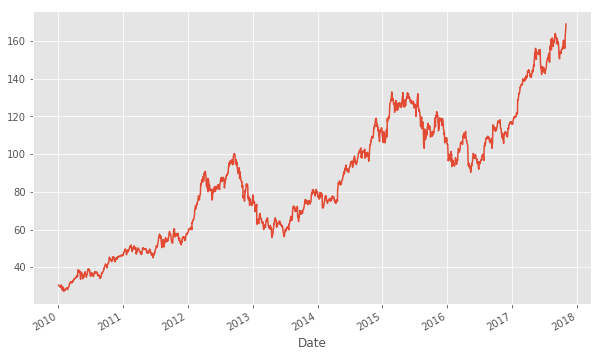

In [8]:
data['AAPL.O'].plot(figsize=(10, 6));

## Vectorized Backtesting

In [9]:
data = pd.DataFrame(data['AAPL.O'])

In [10]:
data.columns = ['Prices']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
Prices    1972 non-null float64
dtypes: float64(1)
memory usage: 30.8 KB


### SMAs

In [12]:
data['SMA1'] = data['Prices'].rolling(42).mean()

In [13]:
data['SMA2'] = data['Prices'].rolling(252).mean()

In [14]:
data.head()

Prices  SMA1  SMA2
Date                             
2010-01-04  30.572827   NaN   NaN
2010-01-05  30.625684   NaN   NaN
2010-01-06  30.138541   NaN   NaN
2010-01-07  30.082827   NaN   NaN
2010-01-08  30.282827   NaN   NaN

In [15]:
data.tail()

Prices        SMA1        SMA2
Date                                      
2017-10-25  156.41  157.610952  139.862520
2017-10-26  157.41  157.514286  140.028472
2017-10-27  163.05  157.517619  140.221210
2017-10-30  166.72  157.597857  140.431528
2017-10-31  169.04  157.717857  140.651766

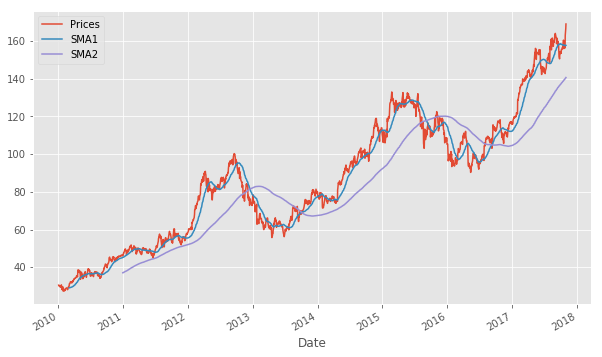

In [16]:
data.plot(figsize=(10, 6));

### Positions 

In [17]:
data['Positions'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)

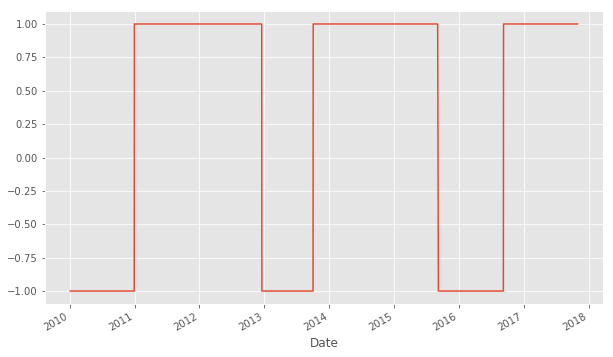

In [18]:
data['Positions'].plot(figsize=(10, 6));

In [19]:
data.dropna().head()

Prices       SMA1       SMA2  Positions
Date                                                  
2010-12-31  46.079954  45.280967  37.120735          1
2011-01-03  47.081381  45.349708  37.186246          1
2011-01-04  47.327096  45.412599  37.252521          1
2011-01-05  47.714238  45.466102  37.322266          1
2011-01-06  47.675667  45.522565  37.392079          1

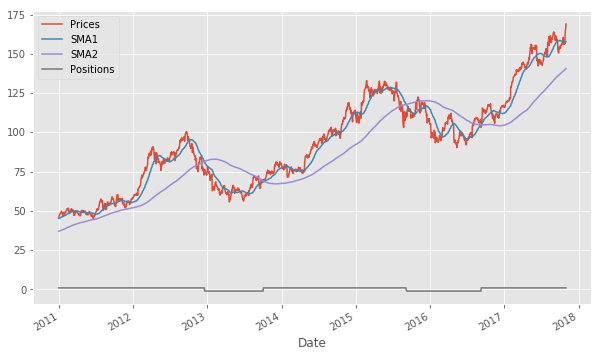

In [20]:
data.dropna().plot(figsize=(10, 6));

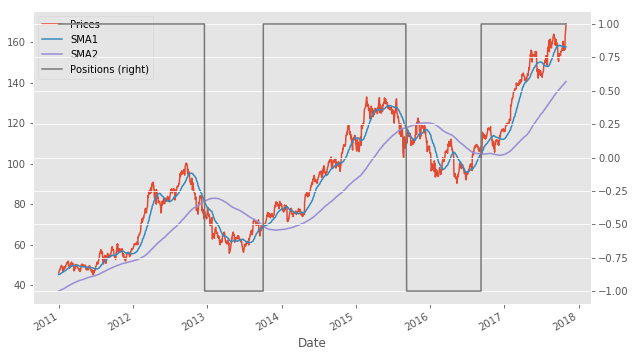

In [21]:
data.dropna().plot(figsize=(10, 6), secondary_y='Positions');

### Log Returns 

In [22]:
data['Returns'] = np.log(data['Prices'] / data['Prices'].shift(1))

In [23]:
data.head()

Prices  SMA1  SMA2  Positions   Returns
Date                                                  
2010-01-04  30.572827   NaN   NaN         -1       NaN
2010-01-05  30.625684   NaN   NaN         -1  0.001727
2010-01-06  30.138541   NaN   NaN         -1 -0.016034
2010-01-07  30.082827   NaN   NaN         -1 -0.001850
2010-01-08  30.282827   NaN   NaN         -1  0.006626

In [24]:
import math

In [25]:
lr = math.log(30.625684 / 30.572827)
lr

0.001727395398339415

In [26]:
math.exp(lr)

1.0017288882052027

In [27]:
30.625684 / 30.572827

1.0017288882052027

### Backtesting

In [28]:
data.tail()

Prices        SMA1        SMA2  Positions   Returns
Date                                                           
2017-10-25  156.41  157.610952  139.862520          1 -0.004402
2017-10-26  157.41  157.514286  140.028472          1  0.006373
2017-10-27  163.05  157.517619  140.221210          1  0.035203
2017-10-30  166.72  157.597857  140.431528          1  0.022259
2017-10-31  169.04  157.717857  140.651766          1  0.013820

In [29]:
data['Strategy'] = data['Positions'].shift(1) * data['Returns']

In [30]:
data[['Returns', 'Strategy']].tail()

Returns  Strategy
Date                          
2017-10-25 -0.004402 -0.004402
2017-10-26  0.006373  0.006373
2017-10-27  0.035203  0.035203
2017-10-30  0.022259  0.022259
2017-10-31  0.013820  0.013820

In [31]:
data.dropna(inplace=True)
data = data.iloc[1:]

In [32]:
data[['Returns', 'Strategy']].sum()

Returns     1.299757
Strategy    1.668989
dtype: float64

In [33]:
np.exp(data[['Returns', 'Strategy']].sum())  # absolute return per USD invested

Returns     3.668406
Strategy    5.306802
dtype: float64

In [34]:
np.exp(data[['Returns', 'Strategy']].sum()) - 1  # relative/net return

Returns     2.668406
Strategy    4.306802
dtype: float64

In [35]:
data[['Returns', 'Strategy']].cumsum().iloc[:10]

Returns  Strategy
Date                          
2011-01-03  0.021500  0.021500
2011-01-04  0.026705  0.026705
2011-01-05  0.034852  0.034852
2011-01-06  0.034043  0.034043
2011-01-07  0.041179  0.041179
2011-01-10  0.059851  0.059851
2011-01-11  0.057468  0.057468
2011-01-12  0.065573  0.065573
2011-01-13  0.069224  0.069224
2011-01-14  0.077292  0.077292

In [36]:
np.exp(data[['Returns', 'Strategy']].cumsum()).iloc[:10]

Returns  Strategy
Date                          
2011-01-03  1.021732  1.021732
2011-01-04  1.027065  1.027065
2011-01-05  1.035466  1.035466
2011-01-06  1.034629  1.034629
2011-01-07  1.042039  1.042039
2011-01-10  1.061678  1.061678
2011-01-11  1.059152  1.059152
2011-01-12  1.067770  1.067770
2011-01-13  1.071677  1.071677
2011-01-14  1.080357  1.080357

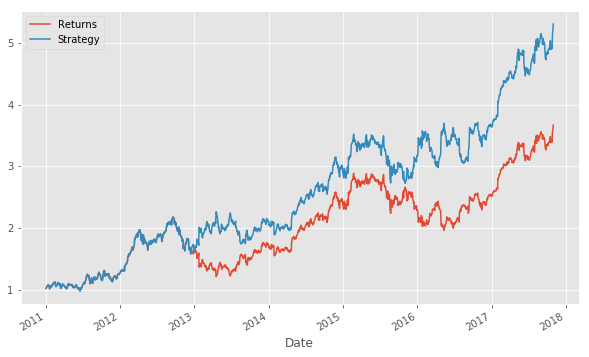

In [37]:
data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

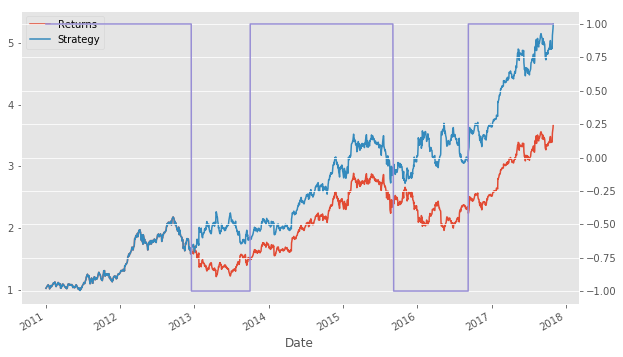

In [38]:
ax = data[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))
data['Positions'].plot(ax=ax, secondary_y='Positions');

## Financial Base Class

In [39]:
class FinancialData(object):
    pass

In [40]:
fd = FinancialData()

In [41]:
fd

In [42]:
def f(x):
    return x ** 2

In [43]:
f(2)

4

In [44]:
class FinancialData(object):
    def __init__(self):
        pass
    
    def f(self, x):
        return x ** 2

In [45]:
fd = FinancialData()

In [46]:
fd.f(12)

144

In [47]:
class FinancialData(object):
    def __init__(self, x):  # special method
        self.x = x
    
    def f(self):
        return self.x ** 2

In [48]:
f(4)

16

In [49]:
fd = FinancialData(4)

In [50]:
fd.x  # attribute

4

In [51]:
fd.f()  # method

16

In [52]:
class FinancialData(object):
    def __init__(self, symbol):  # special method
        self.symbol = symbol
        self.prepare_data()
    
    def prepare_data(self):
        self.raw = pd.read_csv('http://hilpisch.com/tr_eikon_eod_data.csv',
                               index_col=0, parse_dates=True)
        self.data = pd.DataFrame(self.raw[self.symbol])
        self.data['Returns'] = np.log(self.data / self.data.shift(1))

In [53]:
%time fd = FinancialData('AAPL.O')

CPU times: user 13.9 ms, sys: 3.99 ms, total: 17.9 ms
Wall time: 193 ms


In [54]:
fd.symbol

'AAPL.O'

In [55]:
fd.raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 12 columns):
AAPL.O    1972 non-null float64
MSFT.O    1972 non-null float64
INTC.O    1972 non-null float64
AMZN.O    1972 non-null float64
GS.N      1972 non-null float64
SPY       1972 non-null float64
.SPX      1972 non-null float64
.VIX      1972 non-null float64
EUR=      1972 non-null float64
XAU=      1972 non-null float64
GDX       1972 non-null float64
GLD       1972 non-null float64
dtypes: float64(12)
memory usage: 200.3 KB


In [56]:
fd.data.head()

AAPL.O   Returns
Date                           
2010-01-04  30.572827       NaN
2010-01-05  30.625684  0.001727
2010-01-06  30.138541 -0.016034
2010-01-07  30.082827 -0.001850
2010-01-08  30.282827  0.006626

## Class for Vectorized Backtesting 

In [57]:
class SMABacktester(FinancialData):
    def __init__(self, symbol, SMA1, SMA2):
        FinancialData.__init__(self, symbol)
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.prepare_studies()
        
    def prepare_studies(self):
        self.data['SMA1'] = self.data[self.symbol].rolling(self.SMA1).mean()
        self.data['SMA2'] = self.data[self.symbol].rolling(self.SMA2).mean()
        
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(figsize=(10, 6))

In [58]:
sma = SMABacktester('AAPL.O', 42, 252)

In [59]:
sma.data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 4 columns):
AAPL.O     1972 non-null float64
Returns    1971 non-null float64
SMA1       1931 non-null float64
SMA2       1721 non-null float64
dtypes: float64(4)
memory usage: 77.0 KB


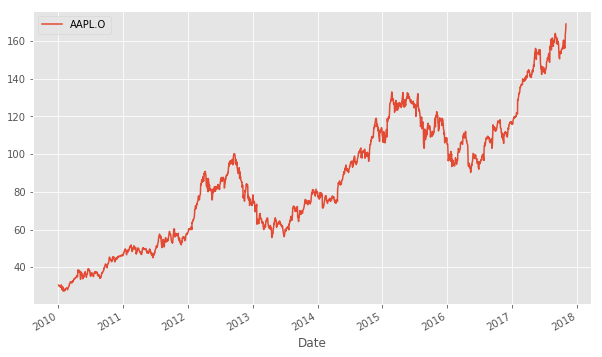

In [60]:
sma.plot_data()

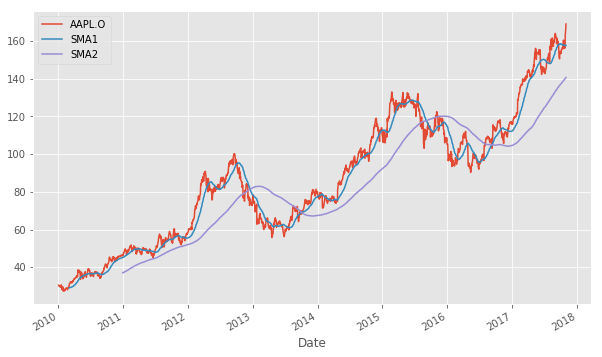

In [61]:
sma.plot_data(['AAPL.O', 'SMA1', 'SMA2'])

In [62]:
class SMABacktester(SMABacktester):
    def run_strategy(self, net=False):
        self.results = self.data.copy().dropna()
        self.results['Positions'] = np.where(
                self.results['SMA1'] > self.results['SMA2'], 1, -1)
        self.results['Strategy'] = self.results['Positions'].shift(1) * self.results['Returns']
        self.results.dropna(inplace=True)
        perf = self.results[['Returns', 'Strategy']].sum().apply(np.exp)
        if net is True:
            return perf - 1
        return perf
        
    def plot_results(self):
        try:
            self.results
        except:
            self.run_strategy()
        self.results[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [63]:
sma = SMABacktester('AAPL.O', 42, 252)

In [64]:
sma.run_strategy()

Returns     3.668406
Strategy    5.306802
dtype: float64

In [65]:
sma.run_strategy(net=True)

Returns     2.668406
Strategy    4.306802
dtype: float64

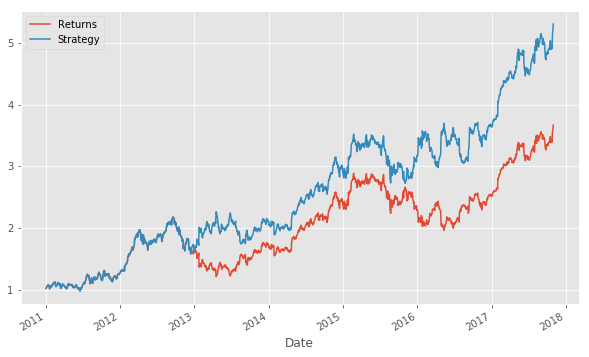

In [66]:
sma.plot_results()

#### Some Backtests

In [67]:
sma = SMABacktester('AAPL.O', 42, 252)

In [68]:
sma.run_strategy()

Returns     3.668406
Strategy    5.306802
dtype: float64

In [69]:
sma = SMABacktester('AAPL.O', 30, 252)

In [70]:
sma.run_strategy()

Returns     3.668406
Strategy    4.888468
dtype: float64

In [71]:
%time sma = SMABacktester('AAPL.O', 30, 180)

CPU times: user 16.2 ms, sys: 2.88 ms, total: 19.1 ms
Wall time: 183 ms


In [72]:
%time sma.run_strategy()

CPU times: user 36.1 ms, sys: 1.65 ms, total: 37.8 ms
Wall time: 36.7 ms


Returns     4.177810
Strategy    4.457191
dtype: float64

## Some Improvements 

In [73]:
class SMABacktester(FinancialData):
    def __init__(self, symbol, SMA1, SMA2):
        FinancialData.__init__(self, symbol)
        self.SMA1 = SMA1
        self.SMA2 = SMA2
        self.prepare_studies()
        
    def prepare_studies(self):
        self.data['SMA1'] = self.data[self.symbol].rolling(self.SMA1).mean()
        self.data['SMA2'] = self.data[self.symbol].rolling(self.SMA2).mean()
        
    def run_strategy(self, SMA=None, net=False):
        if SMA is not None:
            self.SMA1 = SMA[0]
            self.SMA2 = SMA[1]
            self.prepare_studies()
        self.results = self.data.copy().dropna()
        self.results['Positions'] = np.where(
                self.results['SMA1'] > self.results['SMA2'], 1, -1)
        self.results['Strategy'] = self.results['Positions'].shift(1) * self.results['Returns']
        self.results.dropna(inplace=True)
        perf = self.results[['Returns', 'Strategy']].sum().apply(np.exp)
        if net is True:
            return perf - 1
        return perf
    
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(figsize=(10, 6))
        
    def plot_results(self):
        try:
            self.results
        except:
            self.run_strategy()
        self.results[['Returns', 'Strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6))

In [74]:
%time sma = SMABacktester('AAPL.O', 42, 252)

CPU times: user 13.7 ms, sys: 2.92 ms, total: 16.6 ms
Wall time: 181 ms


In [75]:
%time sma.run_strategy()

CPU times: user 31.5 ms, sys: 1.51 ms, total: 33 ms
Wall time: 31.9 ms


Returns     3.668406
Strategy    5.306802
dtype: float64

In [76]:
%time sma.run_strategy(SMA=(30, 252))

CPU times: user 39 ms, sys: 1.56 ms, total: 40.6 ms
Wall time: 39.7 ms


Returns     3.668406
Strategy    4.888468
dtype: float64

In [77]:
%time sma.run_strategy(SMA=(30, 180))

CPU times: user 33.7 ms, sys: 1.6 ms, total: 35.3 ms
Wall time: 34 ms


Returns     4.177810
Strategy    4.457191
dtype: float64

In [78]:
from itertools import product

In [79]:
list(product('ab', range(3)))

[('a', 0), ('a', 1), ('a', 2), ('b', 0), ('b', 1), ('b', 2)]

In [80]:
list(product([10, 15, 20, 25, 30], [150, 175, 200, 225, 250]))

[(10, 150),
 (10, 175),
 (10, 200),
 (10, 225),
 (10, 250),
 (15, 150),
 (15, 175),
 (15, 200),
 (15, 225),
 (15, 250),
 (20, 150),
 (20, 175),
 (20, 200),
 (20, 225),
 (20, 250),
 (25, 150),
 (25, 175),
 (25, 200),
 (25, 225),
 (25, 250),
 (30, 150),
 (30, 175),
 (30, 200),
 (30, 225),
 (30, 250)]

In [81]:
%%time
for SMA in product([10, 15, 20, 25, 30], [150, 175, 200, 225, 250]):
    print(SMA, sma.run_strategy(SMA=SMA).values)

(10, 150) [4.54948915 5.08289727]
(10, 175) [4.4311009  6.88134872]
(10, 200) [3.72101001 4.47263444]
(10, 225) [3.77610794 5.58645691]
(10, 250) [3.6376193  3.59115222]
(15, 150) [4.54948915 4.99473679]
(15, 175) [4.4311009  4.01447783]
(15, 200) [3.72101001 4.73026305]
(15, 225) [3.77610794 4.73065818]
(15, 250) [3.6376193  4.89942916]
(20, 150) [4.54948915 4.25024893]
(20, 175) [4.4311009  3.93375523]
(20, 200) [3.72101001 4.84007863]
(20, 225) [3.77610794 5.68931323]
(20, 250) [3.6376193  4.30918536]
(25, 150) [4.54948915 3.65147892]
(25, 175) [4.4311009  4.54749315]
(25, 200) [3.72101001 4.69869619]
(25, 225) [3.77610794 4.88412096]
(25, 250) [3.6376193  4.05712521]
(30, 150) [4.54948915 3.1958258 ]
(30, 175) [4.4311009  4.54731188]
(30, 200) [3.72101001 5.59403157]
(30, 225) [3.77610794 4.85687906]
(30, 250) [3.6376193 4.734574 ]
CPU times: user 779 ms, sys: 21.6 ms, total: 801 ms
Wall time: 794 ms


In [82]:
class SMABacktester(SMABacktester):
    def optimize_parameters(self, SMA1_list, SMA2_list):
        self.opt_results = pd.DataFrame()
        for i, SMA in enumerate(product(SMA1_list, SMA2_list)):
            perf = sma.run_strategy(SMA=SMA).values
            self.opt_results = self.opt_results.append(pd.DataFrame({'SMA1': SMA[0], 'SMA2': SMA[1],
                                                  'BENCH': perf[0], 'STRAT': perf[1]}, index=[i]))
        self.opt_results = self.opt_results[['SMA1', 'SMA2', 'BENCH', 'STRAT']]
        print('Optimal results:')
        print(self.opt_results.iloc[sma.opt_results['STRAT'].idxmax()])
        
    def print_opt_results(self):
        try:
            self.opt_results
        except:
            print('no optimization results available yet')
        print(self.opt_results)

In [83]:
sma = SMABacktester('AAPL.O', 42, 252)

In [89]:
%time sma.optimize_parameters([10, 15, 20, 25], [150, 175, 200, 225, 250])

Optimal results:
SMA1      10.000000
SMA2     175.000000
BENCH      4.431101
STRAT      6.881349
Name: 1, dtype: float64
CPU times: user 629 ms, sys: 5.86 ms, total: 635 ms
Wall time: 636 ms


In [85]:
sma.opt_results['STRAT'].max()

6.88134872211726

In [86]:
sma.opt_results['STRAT'].idxmax()

1

In [87]:
sma.print_opt_results()

    SMA1  SMA2     BENCH     STRAT
0     10   150  4.549489  5.082897
1     10   175  4.431101  6.881349
2     10   200  3.721010  4.472634
3     10   225  3.776108  5.586457
4     10   250  3.637619  3.591152
5     15   150  4.549489  4.994737
6     15   175  4.431101  4.014478
7     15   200  3.721010  4.730263
8     15   225  3.776108  4.730658
9     15   250  3.637619  4.899429
10    20   150  4.549489  4.250249
11    20   175  4.431101  3.933755
12    20   200  3.721010  4.840079
13    20   225  3.776108  5.689313
14    20   250  3.637619  4.309185
15    25   150  4.549489  3.651479
16    25   175  4.431101  4.547493
17    25   200  3.721010  4.698696
18    25   225  3.776108  4.884121
19    25   250  3.637619  4.057125


In [88]:
sma.opt_results['STRAT'] - sma.opt_results['BENCH']

0     0.533408
1     2.450248
2     0.751624
3     1.810349
4    -0.046467
5     0.445248
6    -0.416623
7     1.009253
8     0.954550
9     1.261810
10   -0.299240
11   -0.497346
12    1.119069
13    1.913205
14    0.671566
15   -0.898010
16    0.116392
17    0.977686
18    1.108013
19    0.419506
dtype: float64

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>